In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# STEP 1: DATA LOADING AND QUALITY CHECKS

In [4]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:


df = pd.read_csv("HR_comma_sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Check for missing values
print("\nbMissing Values Check:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


bMissing Values Check:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Total missing values: 0


In [ ]:
# Basic data information
print("\nDataset Info:")
print(f"Shape: {df.shape}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nBasic Statistics:\n{df.describe()}")


Dataset Info:
Shape: (14999, 10)

Data Types:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

Basic Statistics:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  ti

In [ ]:
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)

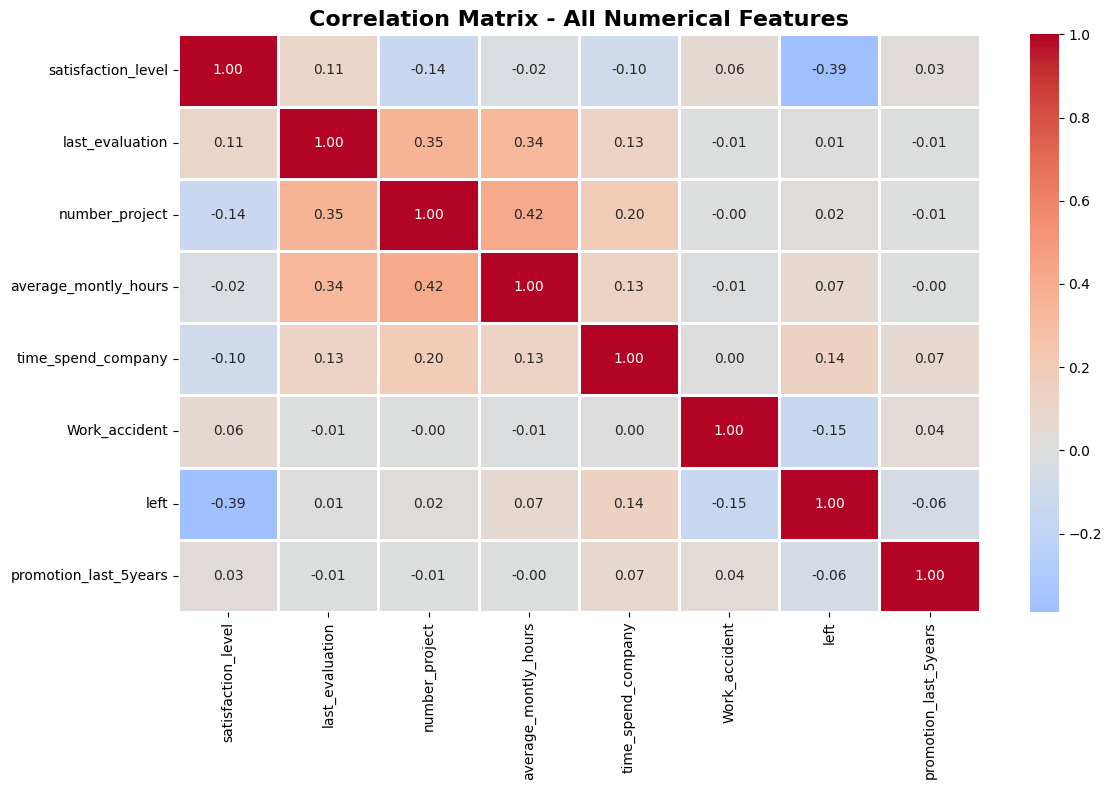

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1)
plt.title('Correlation Matrix - All Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

<Axes: xlabel='satisfaction_level', ylabel='Count'>

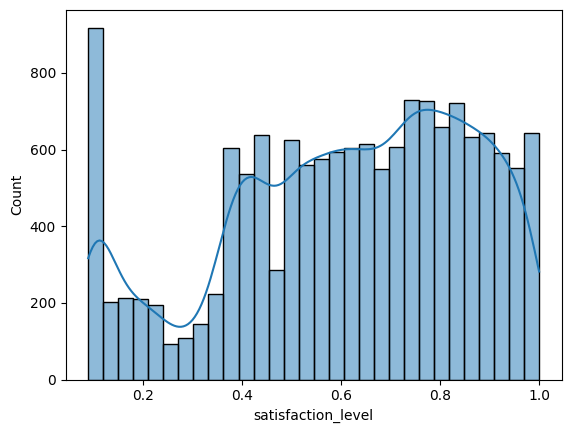

In [ ]:
sns.histplot(df['satisfaction_level'], kde=True)

<Axes: xlabel='last_evaluation', ylabel='Count'>

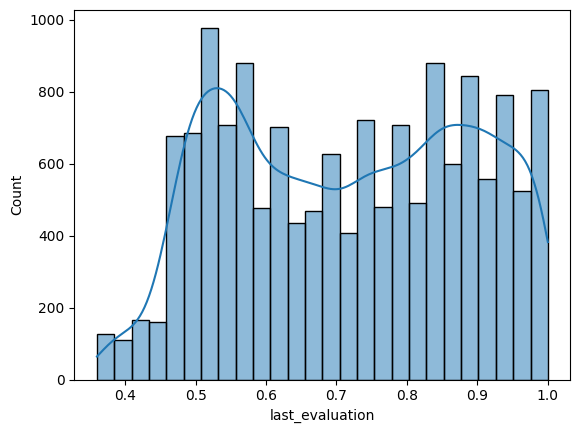

In [ ]:
sns.histplot(df['last_evaluation'], kde=True)


<Axes: xlabel='average_montly_hours', ylabel='Count'>

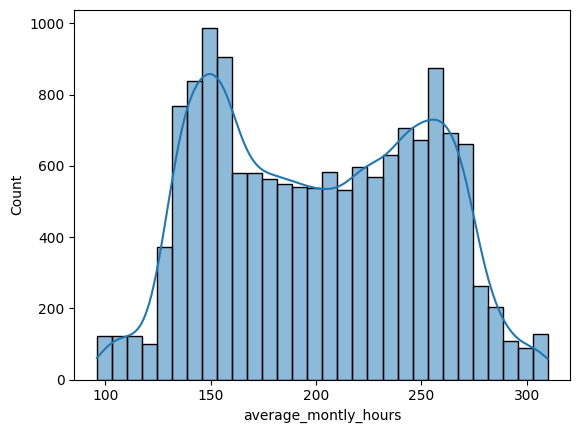

In [ ]:
sns.histplot(df['average_montly_hours'], kde=True)

<Axes: xlabel='number_project', ylabel='count'>

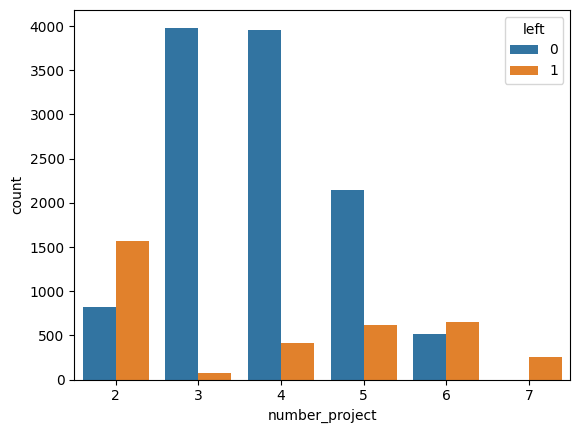

In [ ]:
sns.countplot(x='number_project', hue='left', data=df)


In [ ]:
# 2 projects
# Orange (left) is higher than blue
# Employees with too few projects may feel underutilized or disengaged, leading to higher turnover.

# 3–4 projects
# Blue bars are very high
# Orange bars are very low
# Employees working on 3–4 projects are most stable and least likely to leave. This appears to be the optimal workload range.

# 5–7 projects
# Orange bars increase sharply
# Blue bars drop
# Employees handling 5 or more projects show higher attrition, likely due to: Burnout, Work stress, Poor work-life balance

In [ ]:
# STEP 3: CLUSTERING ANALYSIS

In [ ]:
# Filter employees who left
left_employees = df[df['left'] == 1][['satisfaction_level', 'last_evaluation', 'left']]

# K-Means Clustering
X_cluster = left_employees[['satisfaction_level', 'last_evaluation']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
left_employees['cluster'] = kmeans.fit_predict(X_cluster)



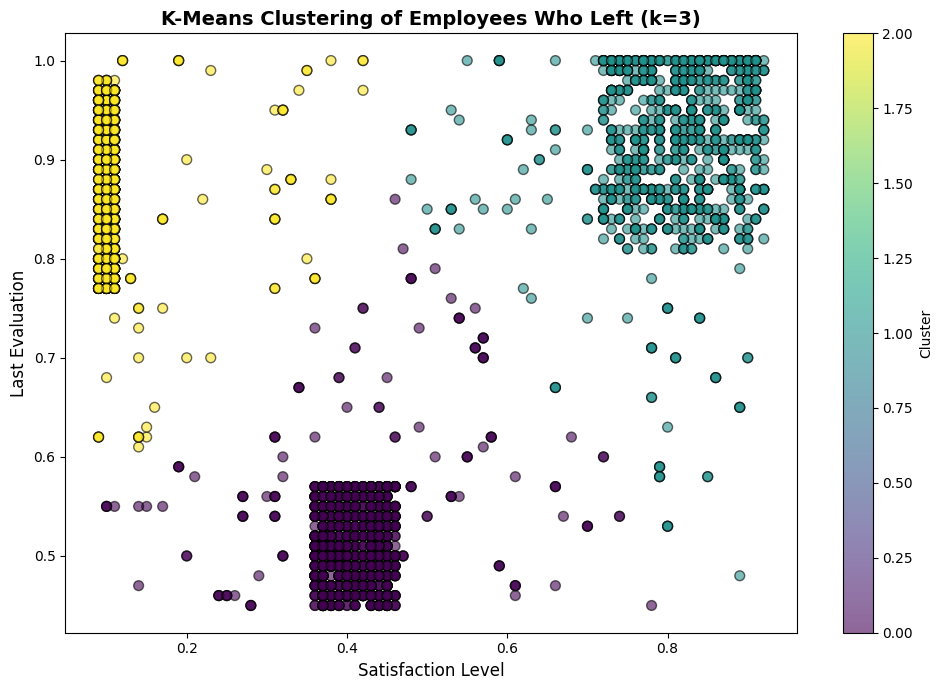

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(left_employees['satisfaction_level'],
                     left_employees['last_evaluation'],
                     c=left_employees['cluster'],
                     cmap='viridis',
                     s=50,
                     alpha=0.6,
                     edgecolors='black')
plt.xlabel('Satisfaction Level', fontsize=12)
plt.ylabel('Last Evaluation', fontsize=12)
plt.title('K-Means Clustering of Employees Who Left (k=3)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('kmeans_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Cluster characteristics
print("\nCluster Characteristics:")
for cluster in range(3):
    cluster_data = left_employees[left_employees['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"  Size: {len(cluster_data)}")
    print(f"  Avg Satisfaction: {cluster_data['satisfaction_level'].mean():.3f}")
    print(f"  Avg Evaluation: {cluster_data['last_evaluation'].mean():.3f}")

print("\nCluster Interpretation:")
print("Cluster 0: Unsatisfied & Underperformers - Moderately Unsatisfied & Low Performers")
print("Cluster 1: Overworked Stars - High satisfaction, high evaluation")
print("Cluster 2: Satisfied but Left - very low satisfaction, high evaluation")





Cluster Characteristics:

Cluster 0:
  Size: 1650
  Avg Satisfaction: 0.410
  Avg Evaluation: 0.517

Cluster 1:
  Size: 977
  Avg Satisfaction: 0.809
  Avg Evaluation: 0.912

Cluster 2:
  Size: 944
  Avg Satisfaction: 0.111
  Avg Evaluation: 0.869

Cluster Interpretation:
Cluster 0: Unsatisfied & Underperformers - Moderately Unsatisfied & Low Performers
Cluster 1: Overworked Stars - High satisfaction, high evaluation
Cluster 2: Satisfied but Left - very low satisfaction, high evaluation


In [ ]:
# STEP 4: DATA PREPROCESSING AND SMOTE

In [ ]:
# Separate features and target
X = df.drop('left', axis=1)
y = df['left']

# Separate categorical and numerical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"\nShape after encoding: {X_encoded.shape}")

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=123, stratify=y
)

print(f"\nTrain set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nClass distribution before SMOTE:")
print(f"Train - Class 0: {sum(y_train==0)}, Class 1: {sum(y_train==1)}")



Categorical columns: ['sales', 'salary']
Numerical columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

Shape after encoding: (14999, 18)

Train set size: (11999, 18)
Test set size: (3000, 18)

Class distribution before SMOTE:
Train - Class 0: 9142, Class 1: 2857


In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nClass distribution after SMOTE:")
print(f"Train - Class 0: {sum(y_train_balanced==0)}, Class 1: {sum(y_train_balanced==1)}")



Class distribution after SMOTE:
Train - Class 0: 9142, Class 1: 9142


In [ ]:
# STEP 5: MODEL TRAINING WITH 5-FOLD CROSS-VALIDATION

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_results = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print('='*60)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced,
                                cv=skf, scoring='accuracy')

    print(f"\n5-Fold CV Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Train final model
    model.fit(X_train_balanced, y_train_balanced)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Classification report
    print(f"\nClassification Report on Test Set:")
    print(classification_report(y_test, y_pred))

    # Store results
    model_results[name] = {
        'model': model,
        'cv_scores': cv_scores,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }


Training: Logistic Regression

5-Fold CV Accuracy Scores: [0.79217938 0.80147662 0.79108559 0.79846869 0.79157549]
Mean CV Accuracy: 0.7950 (+/- 0.0042)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000


Training: Random Forest

5-Fold CV Accuracy Scores: [0.9852338  0.98331966 0.9846869  0.98386656 0.98577681]
Mean CV Accuracy: 0.9846 (+/- 0.0009)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99    

In [ ]:
# Best Model: Random Forest Classifier
# Justification:
# The Random Forest model achieved the highest recall (0.98) for employees who left,
# which is the most critical metric for employee turnover prediction.
# Since missing a potential churn employee is more costly than a false alert,
# recall was prioritized over accuracy.

In [ ]:
# STEP 6: MODEL EVALUATION AND SELECTION

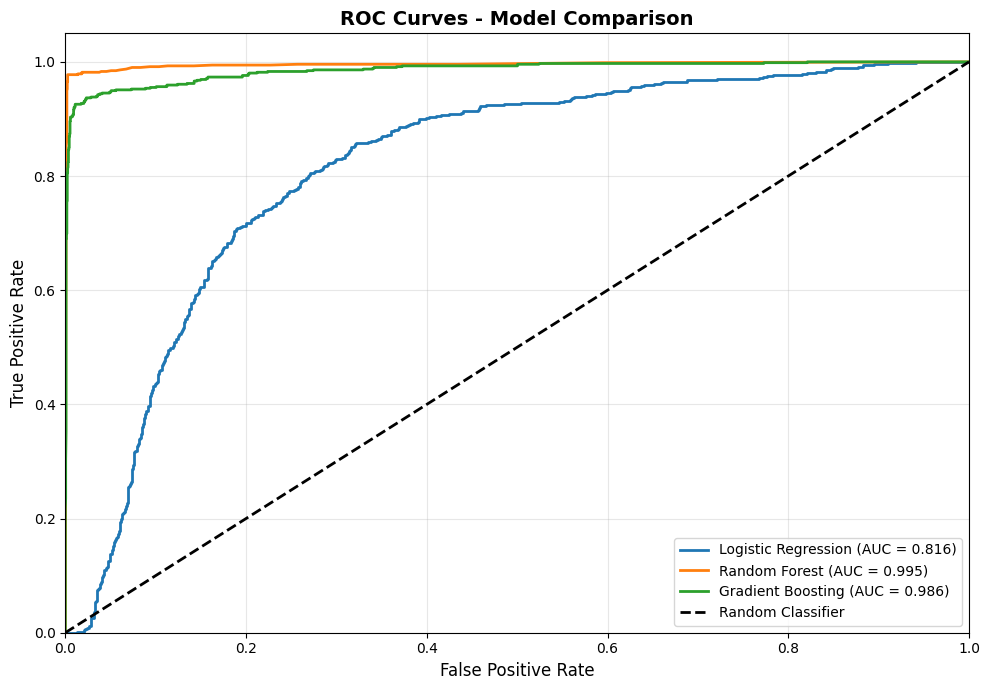

In [ ]:
# ROC Curves
plt.figure(figsize=(10, 7))

for name, results in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

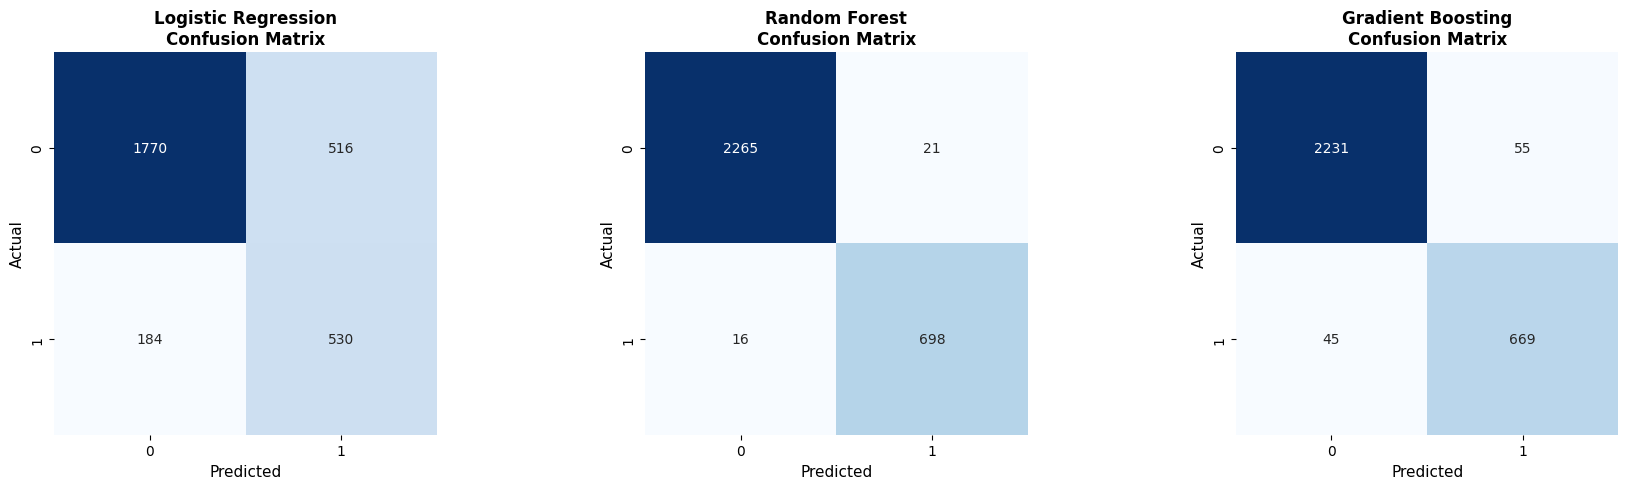

In [ ]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, results) in enumerate(model_results.items()):
    cm = confusion_matrix(y_test, results['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar=False, square=True)
    axes[idx].set_xlabel('Predicted', fontsize=11)
    axes[idx].set_ylabel('Actual', fontsize=11)
    axes[idx].set_title(f'{name}\nConfusion Matrix', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
best_model_name = None
best_roc_auc = 0

for name, results in model_results.items():
    cm = confusion_matrix(y_test, results['y_pred'])
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    roc_auc = roc_auc_score(y_test, results['y_pred_proba'])

    print(f"{name:<25} {accuracy:<10.4f} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f} {roc_auc:<10.4f}")

    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model_name = name

print(f"\n{'='*80}")
print(f"BEST MODEL: {best_model_name} (ROC-AUC: {best_roc_auc:.4f})")


print("\nMetric Selection Justification:")
print("- RECALL is the most important metric for employee turnover prediction")
print("- High recall ensures we identify most employees at risk of leaving")
print("- Missing a potential departure (False Negative) is costlier than a False Positive")
print("- ROC-AUC provides overall model performance across all thresholds")


Logistic Regression       0.7667     0.5067     0.7423     0.6023     0.8162    
Random Forest             0.9877     0.9708     0.9776     0.9742     0.9954    
Gradient Boosting         0.9667     0.9240     0.9370     0.9305     0.9855    

BEST MODEL: Random Forest (ROC-AUC: 0.9954)

Metric Selection Justification:
- RECALL is the most important metric for employee turnover prediction
- High recall ensures we identify most employees at risk of leaving
- Missing a potential departure (False Negative) is costlier than a False Positive
- ROC-AUC provides overall model performance across all thresholds


In [ ]:
# STEP 7: RETENTION STRATEGY RECOMMENDATIONS



Risk Zone Distribution:
Risk_Zone
High-Risk Zone (Red)          660
Low-Risk Zone (Yellow)        115
Medium-Risk Zone (Orange)      44
Safe Zone (Green)            2181
Name: count, dtype: int64


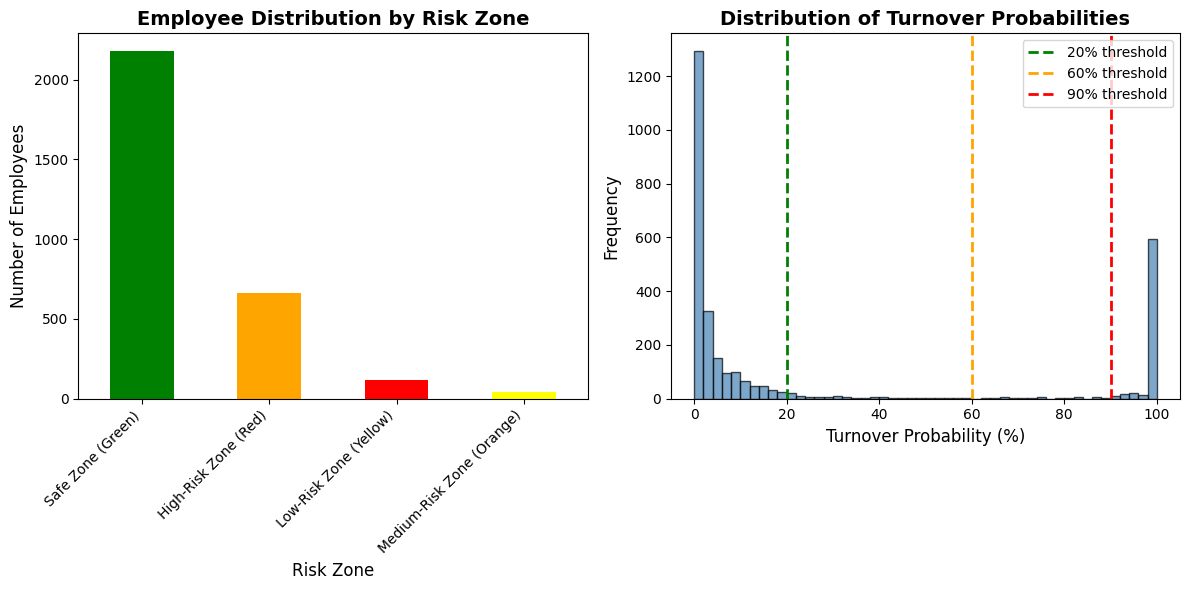


ANALYSIS COMPLETE

Key Findings:
1. Best Model: Random Forest with ROC-AUC of 0.9954
2. Total employees analyzed: 3000
3. High-risk employees requiring immediate attention: 660
4. Primary turnover factors: Check correlation matrix and cluster analysis above

Recommendation: Focus resources on Medium and High-Risk zones for maximum impact.


In [ ]:
# Get best model predictions
best_model = model_results[best_model_name]['model']
turnover_probabilities = best_model.predict_proba(X_test)[:, 1] * 100

# Create risk zones
def assign_risk_zone(prob):
    if prob < 20:
        return 'Safe Zone (Green)'
    elif prob < 60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

risk_zones = [assign_risk_zone(p) for p in turnover_probabilities]
risk_df = pd.DataFrame({
    'Turnover_Probability': turnover_probabilities,
    'Risk_Zone': risk_zones
})

print("\nRisk Zone Distribution:")
print(risk_df['Risk_Zone'].value_counts().sort_index())

# Visualize risk distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
risk_df['Risk_Zone'].value_counts().plot(kind='bar', color=['green', 'orange', 'red', 'yellow'])
plt.xlabel('Risk Zone', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.title('Employee Distribution by Risk Zone', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.hist(turnover_probabilities, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(x=20, color='green', linestyle='--', linewidth=2, label='20% threshold')
plt.axvline(x=60, color='orange', linestyle='--', linewidth=2, label='60% threshold')
plt.axvline(x=90, color='red', linestyle='--', linewidth=2, label='90% threshold')
plt.xlabel('Turnover Probability (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Turnover Probabilities', fontsize=14, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.savefig('risk_zones.png', dpi=300, bbox_inches='tight')
plt.show()


print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print(f"\nKey Findings:")
print(f"1. Best Model: {best_model_name} with ROC-AUC of {best_roc_auc:.4f}")
print(f"2. Total employees analyzed: {len(risk_df)}")
print(f"3. High-risk employees requiring immediate attention: {sum(risk_df['Risk_Zone'] == 'High-Risk Zone (Red)')}")
print(f"4. Primary turnover factors: Check correlation matrix and cluster analysis above")
print("\nRecommendation: Focus resources on Medium and High-Risk zones for maximum impact.")